For this project, you will analyze data on GDP and life expectancy from the WHO and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries. During this project, you will analyze, prepare, and plot data in order to answer questions in a meaningful way.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('all_data.csv')
print(df.head(),'\n') 
print(df.info(),'\n')
print(df.describe(),'\n')

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None 

              Year  Life expectancy at birth (years)           GD

In [6]:
df.rename(columns={'Country':'country', 'Year':'year', 'Life expectancy at birth (years)':'life_expectancy', 'GDP':'gdp'}, inplace=True)
df['gdp_billion'] = df.gdp/(10**9)
print(df.head())

  country  year  life_expectancy           gdp  gdp_billion
0   Chile  2000             77.3  7.786093e+10    77.860932
1   Chile  2001             77.3  7.097992e+10    70.979924
2   Chile  2002             77.8  6.973681e+10    69.736811
3   Chile  2003             77.9  7.564346e+10    75.643460
4   Chile  2004             78.0  9.921039e+10    99.210393


Project Scope:
- Has GDP increased over time in the six nations?
GDP has increased 'significantly' in China and USA, while it is quite stagnant in Germany, Mexico, Chile, and Zimbabwe

- Has life expectancy increased over time in the six nations?
Life expectancy for Zimbabwe has increased from 45 years to 60 years starts from 2008, while in other countries the life expectancy has not increased 'significantly'

- Is there a correlation between GDP and life expectancy of a country?
Using Pearson correlation, there are no linear relationship between GDP and life expectancy of a country.

What is the average life expectancy in these nations?

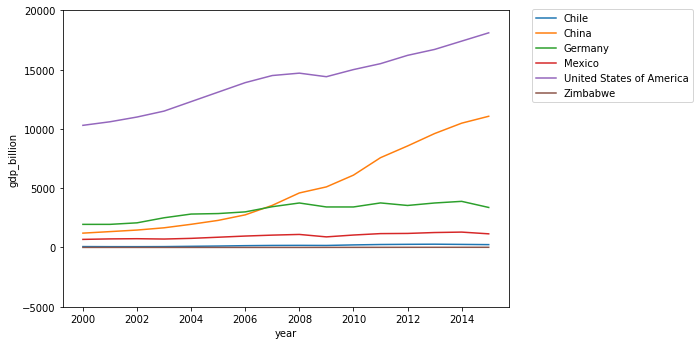

In [20]:
plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
sns.lineplot(data=df, x='year', y='gdp_billion', hue='country')
plt.ylim(ymax = 20000, ymin = -5000)
plt.legend(bbox_to_anchor=(1.04, 1.02))

plt.show()

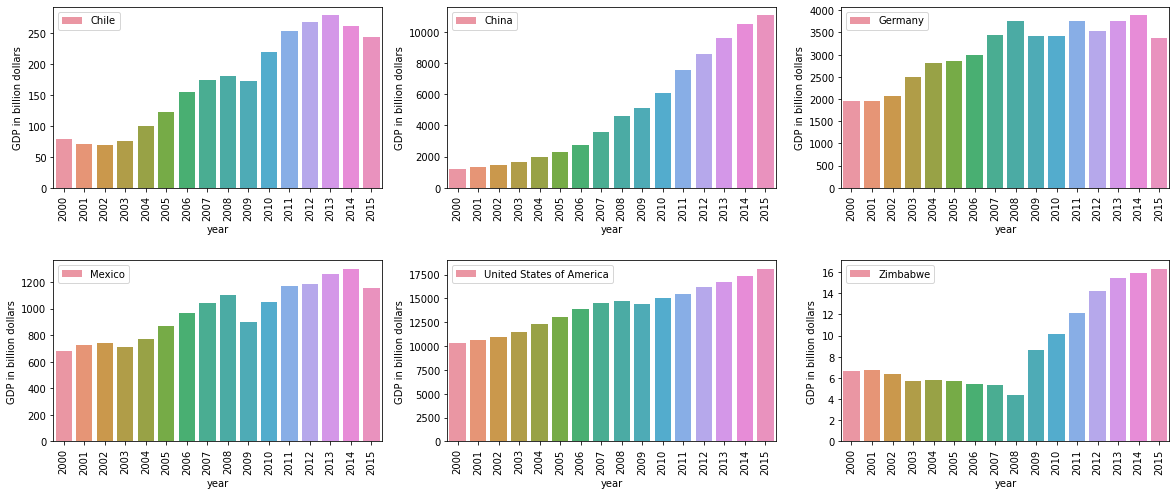

In [22]:
plt.figure(figsize=(20,8))

countries = ['Chile','China','Germany','Mexico','United States of America','Zimbabwe']
n = 1

for country in countries:
    plt.subplot(2,3,n)
    sns.barplot(data=df[df.country == country], x='year', y='gdp_billion', label=country)
    plt.xticks(rotation=90)
    plt.ylabel('GDP in billion dollars')
    plt.legend()
    n += 1

plt.subplots_adjust(hspace=0.4)
plt.show()

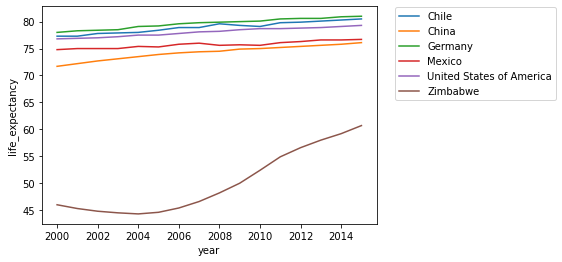

In [10]:
sns.lineplot(data=df, x='year', y='life_expectancy', hue='country')
plt.legend(bbox_to_anchor=(1.04, 1.02))
plt.show()

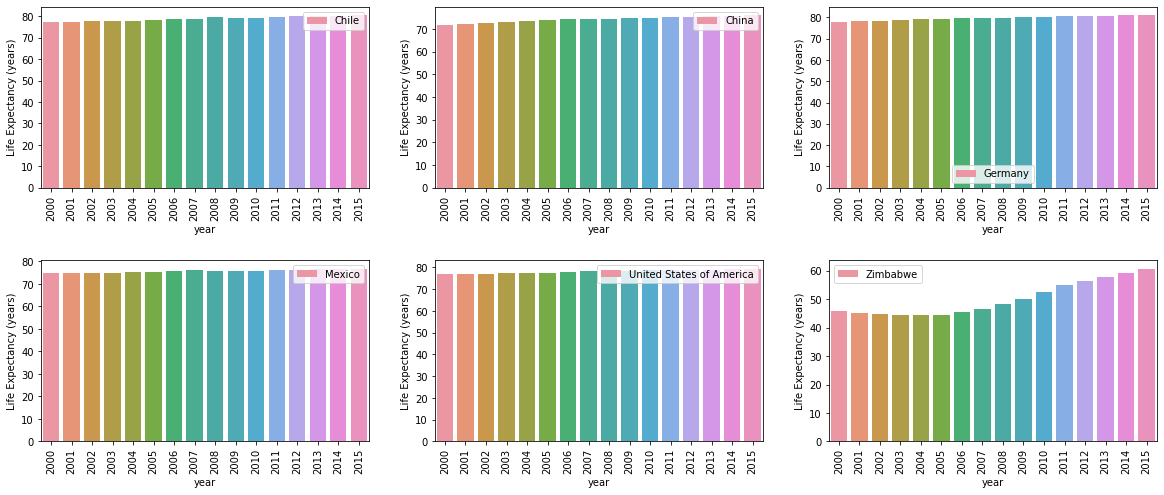

In [25]:
plt.figure(figsize=(20,8))

countries = ['Chile','China','Germany','Mexico','United States of America','Zimbabwe']
n = 1

for country in countries:
    plt.subplot(2,3,n)
    sns.barplot(data=df[df.country == country], x='year', y='life_expectancy', label=country)
    plt.xticks(rotation=90)
    plt.ylabel('Life Expectancy (years)')
    plt.legend()
    n += 1

plt.subplots_adjust(hspace=0.4)
plt.show()

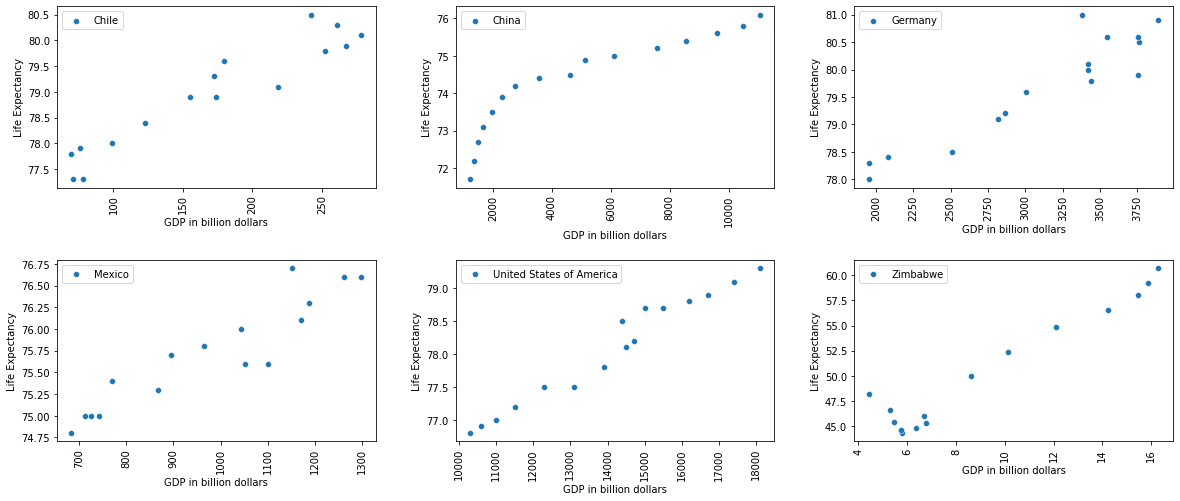

In [16]:
plt.figure(figsize=(20,8))

countries = ['Chile','China','Germany','Mexico','United States of America','Zimbabwe']
n = 1

for country in countries:
    plt.subplot(2,3,n)
    sns.scatterplot(data=df[df.country == country], x='gdp_billion', y='life_expectancy', label=country)
    plt.xticks(rotation=90)
    plt.xlabel('GDP in billion dollars')
    plt.ylabel('Life Expectancy')
    plt.legend()
    n += 1

plt.subplots_adjust(wspace=0.25, hspace = 0.4)
plt.show()

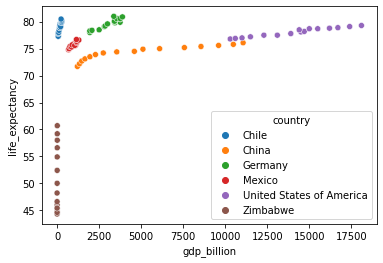

In [17]:
sns.scatterplot(data=df, x='gdp_billion', y='life_expectancy', hue='country')
plt.show()


In [21]:
from scipy.stats import pearsonr

corr, p = pearsonr(df.gdp, df.life_expectancy)
print('Pearson correlation for whole data: ',p)

countries = ['Chile','China','Germany','Mexico','United States of America','Zimbabwe']

for country in countries:
    corr, p = pearsonr(df.gdp_billion[df.country == country], df.life_expectancy[df.country == country])
    print('Pearson correlation for {}: '.format(country),p)

Pearson correlation for whole data:  0.0006187129569469811
Pearson correlation for Chile:  1.8659139746585884e-08
Pearson correlation for China:  1.1250985720700642e-06
Pearson correlation for Germany:  1.401881553404592e-07
Pearson correlation for Mexico:  1.4686960248304982e-07
Pearson correlation for United States of America:  1.7499709269099464e-11
Pearson correlation for Zimbabwe:  1.2358516366846197e-09


In [22]:
from scipy.stats import pearsonr

corr, p = pearsonr(df.gdp, df.life_expectancy)
print('Pearson correlation for whole data: ',p)

countries = ['Chile','China','Germany','Mexico','United States of America','Zimbabwe']

for country in countries:
    corr, p = pearsonr(df.gdp[df.country == country], df.life_expectancy[df.country == country])
    print('Pearson correlation for {}: '.format(country),p)

Pearson correlation for whole data:  0.0006187129569469811
Pearson correlation for Chile:  1.865913974658531e-08
Pearson correlation for China:  1.1250985720700735e-06
Pearson correlation for Germany:  1.401881553404576e-07
Pearson correlation for Mexico:  1.4686960248304982e-07
Pearson correlation for United States of America:  1.7499709269099464e-11
Pearson correlation for Zimbabwe:  1.2358516366846197e-09


In [25]:
import numpy as np

countries = ['Chile','China','Germany','Mexico','United States of America','Zimbabwe']

for country in countries:
    mean = df.life_expectancy[df.country == country].mean()
    print('Average Life Expectancy in {}: '.format(country), mean,' years.')

Average Life Expectancy in Chile:  78.94374999999998  years.
Average Life Expectancy in China:  74.26249999999999  years.
Average Life Expectancy in Germany:  79.65625  years.
Average Life Expectancy in Mexico:  75.71875  years.
Average Life Expectancy in United States of America:  78.0625  years.
Average Life Expectancy in Zimbabwe:  50.09375000000001  years.
